### Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.


In [1]:
#libraries
import pandas as pd ,numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

#setting this will help to reproduce same results everytime 
np.random.seed(1)

#filterwarnings and autosave
import warnings 
warnings.filterwarnings("ignore")

%autosave 1

Autosaving every 1 seconds


In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)

### Importing data

In [3]:
df = pd.read_csv("Leads.csv")
df.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                            

### Dealing with missing values 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
import plotly.express as px

fig = px.bar(df.isna().mean())
fig.update_traces(marker_color='rgb(158,202,225)',texttemplate='%{text:.2s}', textposition='outside', text=df.isna().sum())
fig.update_layout(title_text='Null value analysis',title_x=0.5,uniformtext_minsize=8, uniformtext_mode='hide',
                 width=1000, height=700)
fig.update_layout({'plot_bgcolor': 'rgba(255,255,255,0)'})
fig.show()

As we can see that there are missing values  we will deal with them

In [6]:
#droppiing id columns 
df.drop(["Prospect ID","Lead Number"],axis=1,inplace=True)

In [7]:
df.head()

Lead Origin     Lead Source Do Not Email Do Not Call  \
0                      API      Olark Chat           No          No   
1                      API  Organic Search           No          No   
2  Landing Page Submission  Direct Traffic           No          No   
3  Landing Page Submission  Direct Traffic           No          No   
4  Landing Page Submission          Google           No          No   

   Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

             Last Activity Country           Specialization  \
0  Page Visited on Website     NaN                   Select   
1             Email Opened   India                   Select   
2             Email Opened   India  Business Administration   
3              Unreachable   India    Media and Advertising   
4        Converted to Lead   India                   Select   

  How did you hear about X Education What is your current occupation  \
0                             Select                      Unemployed   
1                             Select                      Unemployed   
2                             Select                         Student   
3                      Word Of Mouth                      Unemployed   
4                              Other                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                                No                        No          Select   
4                                No                        No          Select   

     City Asymmetrique Activity Index Asymmetrique Profile Index  \
0  Select                   02.Medium                  02.Medium   
1  Select                   02.Medium                 

In [8]:
##checeking the unique values so that we can divide the data into categorical and numerical 
df.nunique().sort_values()

I agree to pay the amount through cheque       1
Magazine                                       1
Get updates on DM Content                      1
Update me on Supply Chain Content              1
Receive More Updates About Our Courses         1
                                            ... 
Tags                                          26
Country                                       38
TotalVisits                                   41
Page Views Per Visit                         114
Total Time Spent on Website                 1731
Length: 35, dtype: int64

In [9]:
#getting the categorical data
cat_cols_to_plot = df.nunique().sort_values()[df.nunique().sort_values() > 1].keys().to_list()

In [10]:
df = df[cat_cols_to_plot]
df.head()

X Education Forums Newspaper Article Search Digital Advertisement  \
0                 No                No     No                    No   
1                 No                No     No                    No   
2                 No                No     No                    No   
3                 No                No     No                    No   
4                 No                No     No                    No   

  Through Recommendations Newspaper  Converted Do Not Call Do Not Email  \
0                      No        No          0          No           No   
1                      No        No          0          No           No   
2                      No        No          1          No           No   
3                      No        No          0          No           No   
4                      No        No          1          No           No   

  A free copy of Mastering The Interview Asymmetrique Activity Index  \
0                                     No                   02.Medium   
1                                     No                   02.Medium   
2                                    Yes                   02.Medium   
3                                     No                   02.Medium   
4                                     No                   02.Medium   

  Asymmetrique Profile Index What matters most to you in choosing a course  \
0                  02.Medium                       Better Career Prospects   
1                  02.Medium                       Better Career Prospects   
2                    01.High                       Better Career Prospects   
3                    01.High                       Better Career Prospects   
4                    01.High                       Better Career Prospects   

       Lead Quality              Lead Origin    Lead Profile  \
0  Low in Relevance                      API          Select   
1               NaN                      API          Select   
2          Might be  Landing Page Submission  Potential Lead   
3          Not Sure  Landing Page Submission          Select   
4          Might be  Landing Page Submission          Select   

  What is your current occupation    City How did you hear about X Education  \
0                      Unemployed  Select                             Select   
1                      Unemployed  Select                             Select   
2                         Student  Mumbai                             Select   
3                      Unemployed  Mumbai                      Word Of Mouth   
4                      Unemployed  Mumbai                              Other   

   Asymmetrique Profile Score  Asymmetrique Activity Score  \
0                        15.0                         15.0   
1                        15.0                         15.0   
2                        20.0                         14.0   
3                        17.0                         13.0   
4                        18.0                         15.0   

  Last Notable Activity            Last Activity           Specialization  \
0              Modified  Page Visited on Website                   Select   
1          Email Opened             Email Opened                   Select   
2          Email Opened             Email Opened  Business Administration   
3              Modified              Unreachable    Media and Advertising   
4              Modified        Converted to Lead                   Select   

      Lead Source                                 Tags Country  TotalVisits  \
0      Olark Chat          Interested in other courses     NaN          0.0   
1  Organic Search                              Ringing   India          5.0   
2  Direct Traffic  Will revert after reading the email   India          2.0   
3  Direct Traffic                              Ringing   India          1.0   
4          Google  Will revert after reading the email   India          2.0   

   Page Views Per Visit  Total Time Spent on 

In [11]:
df.replace("Select",np.NaN,inplace=True)
df.head()

X Education Forums Newspaper Article Search Digital Advertisement  \
0                 No                No     No                    No   
1                 No                No     No                    No   
2                 No                No     No                    No   
3                 No                No     No                    No   
4                 No                No     No                    No   

  Through Recommendations Newspaper  Converted Do Not Call Do Not Email  \
0                      No        No          0          No           No   
1                      No        No          0          No           No   
2                      No        No          1          No           No   
3                      No        No          0          No           No   
4                      No        No          1          No           No   

  A free copy of Mastering The Interview Asymmetrique Activity Index  \
0                                     No                   02.Medium   
1                                     No                   02.Medium   
2                                    Yes                   02.Medium   
3                                     No                   02.Medium   
4                                     No                   02.Medium   

  Asymmetrique Profile Index What matters most to you in choosing a course  \
0                  02.Medium                       Better Career Prospects   
1                  02.Medium                       Better Career Prospects   
2                    01.High                       Better Career Prospects   
3                    01.High                       Better Career Prospects   
4                    01.High                       Better Career Prospects   

       Lead Quality              Lead Origin    Lead Profile  \
0  Low in Relevance                      API             NaN   
1               NaN                      API             NaN   
2          Might be  Landing Page Submission  Potential Lead   
3          Not Sure  Landing Page Submission             NaN   
4          Might be  Landing Page Submission             NaN   

  What is your current occupation    City How did you hear about X Education  \
0                      Unemployed     NaN                                NaN   
1                      Unemployed     NaN                                NaN   
2                         Student  Mumbai                                NaN   
3                      Unemployed  Mumbai                      Word Of Mouth   
4                      Unemployed  Mumbai                              Other   

   Asymmetrique Profile Score  Asymmetrique Activity Score  \
0                        15.0                         15.0   
1                        15.0                         15.0   
2                        20.0                         14.0   
3                        17.0                         13.0   
4                        18.0                         15.0   

  Last Notable Activity            Last Activity           Specialization  \
0              Modified  Page Visited on Website                      NaN   
1          Email Opened             Email Opened                      NaN   
2          Email Opened             Email Opened  Business Administration   
3              Modified              Unreachable    Media and Advertising   
4              Modified        Converted to Lead                      NaN   

      Lead Source                                 Tags Country  TotalVisits  \
0      Olark Chat          Interested in other courses     NaN          0.0   
1  Organic Search                              Ringing   India          5.0   
2  Direct Traffic  Will revert after reading the email   India          2.0   
3  Direct Traffic                              Ringing   India          1.0   
4          Google  Will revert after reading the email   India          2.0   

   Page Views Per Visit  Total Time Spent on 

In [12]:
fig = px.bar(df.isna().mean())
fig.update_traces(marker_color='rgb(158,202,225)',texttemplate='%{text:.2s}', textposition='outside', text=df.isna().sum())
fig.update_layout(title_text='Null value analysis',title_x=0.5,uniformtext_minsize=8, uniformtext_mode='hide',
                 width=1000, height=700)
fig.update_layout({'plot_bgcolor': 'rgba(255,255,255,0)'})
fig.show()

In [13]:
df = df.loc[:, df.isnull().mean() < .50]
print(f"after dropping the features we have {df.shape[0]} datapoints and {df.shape[1]} features")

after dropping the features we have 9240 datapoints and 27 features


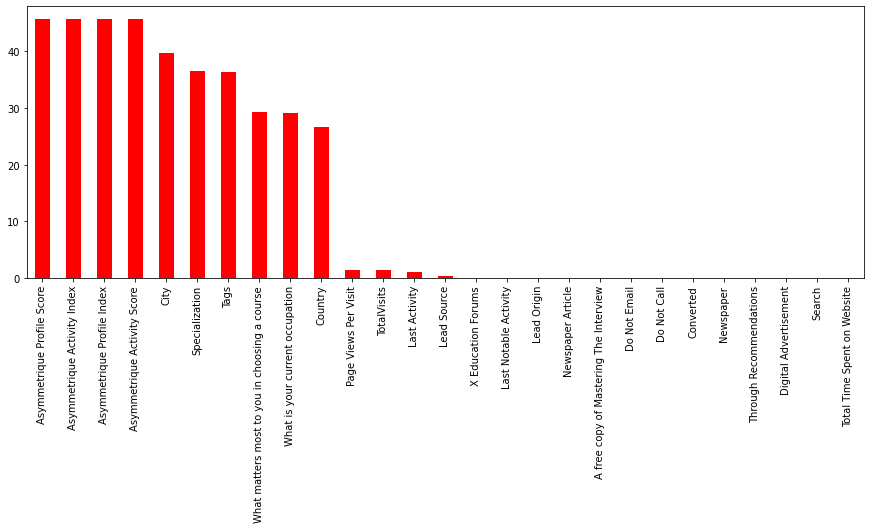

In [14]:
((df.isna().mean().sort_values(ascending=False))*100).plot(kind='bar',figsize=(15,5),color='red')
plt.show()

### EDA

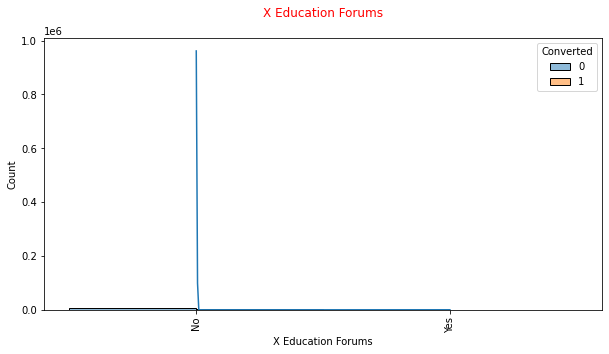

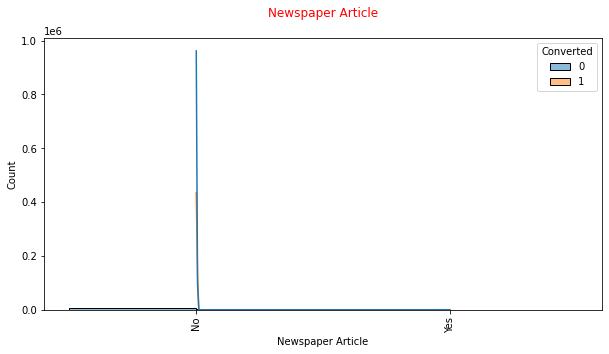

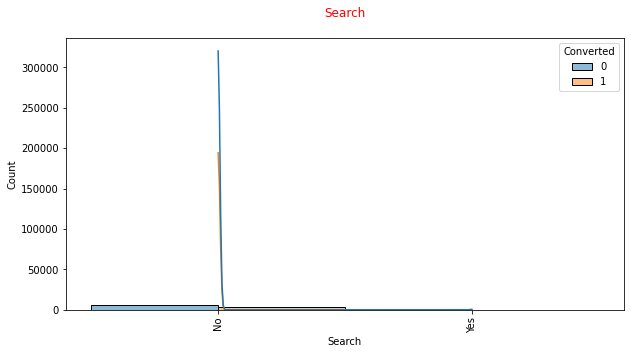

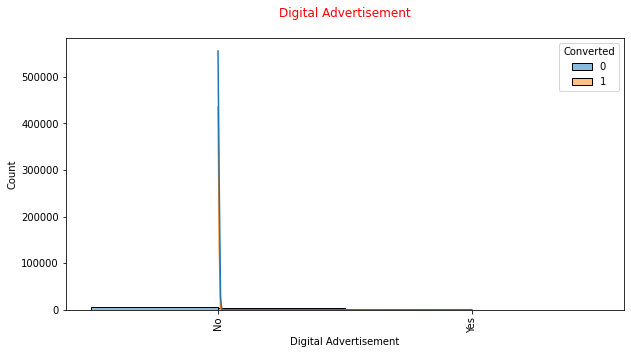

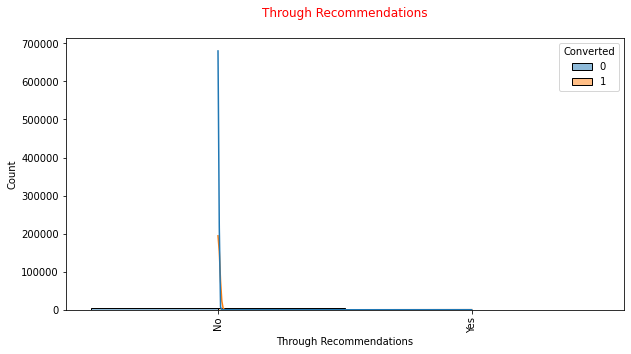

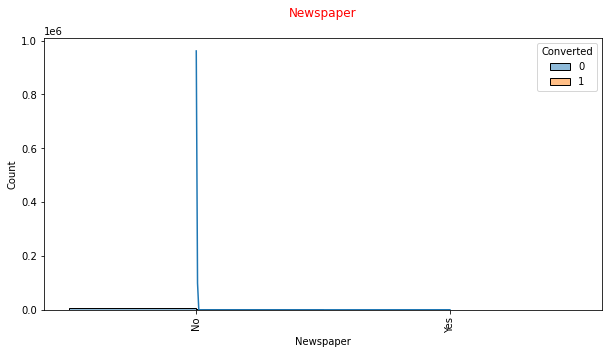

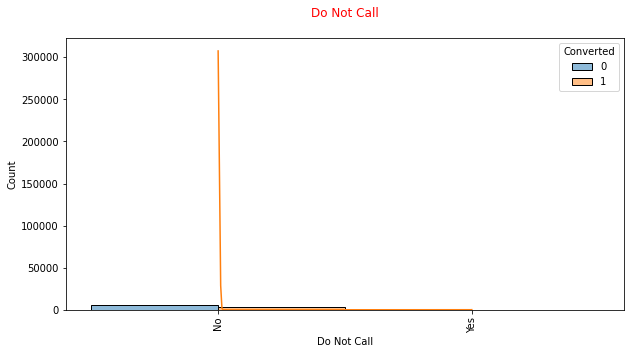

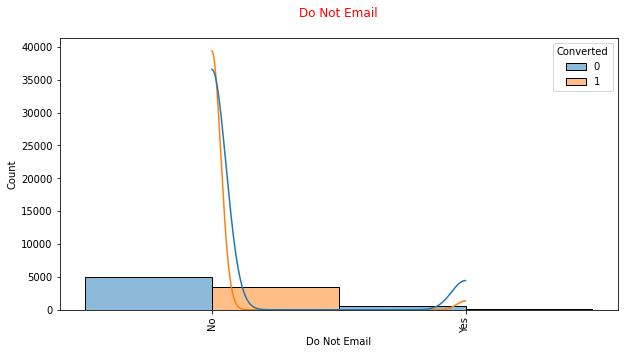

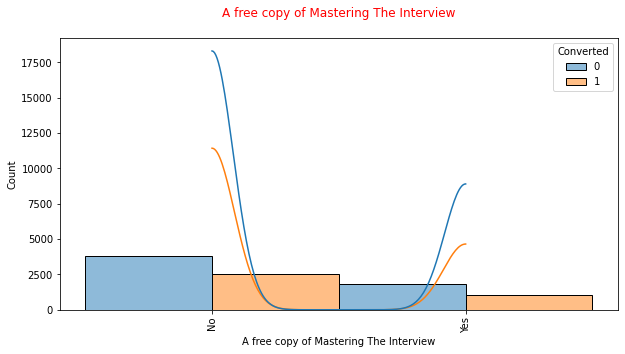

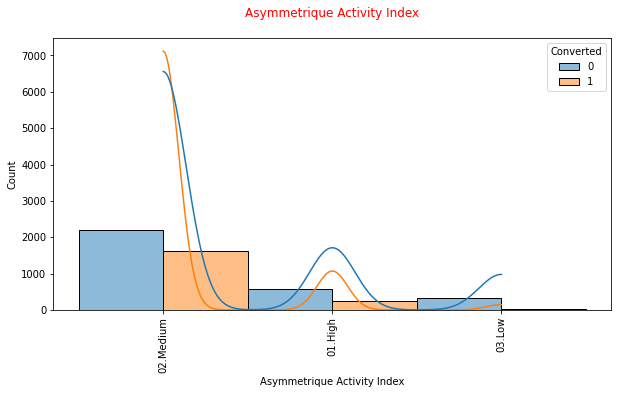

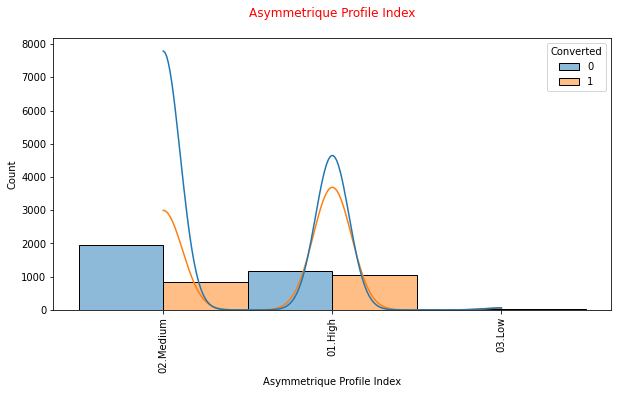

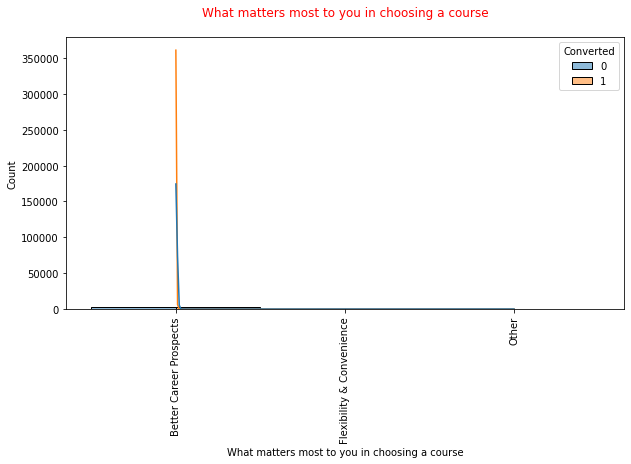

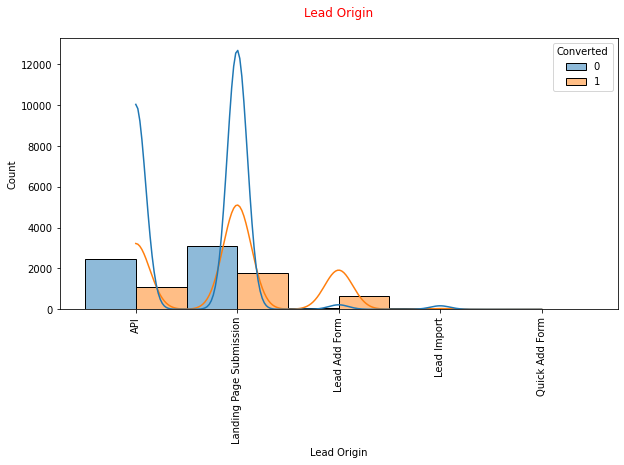

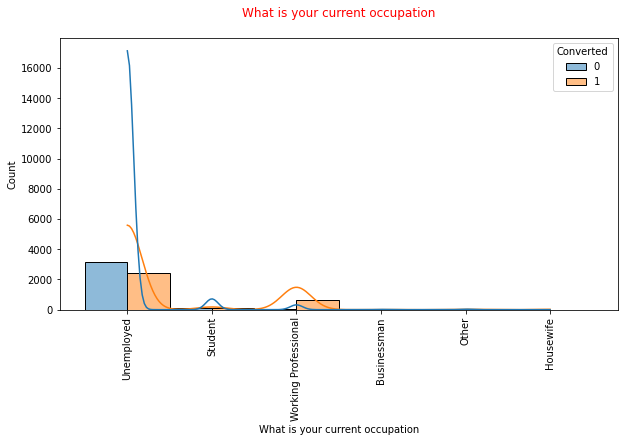

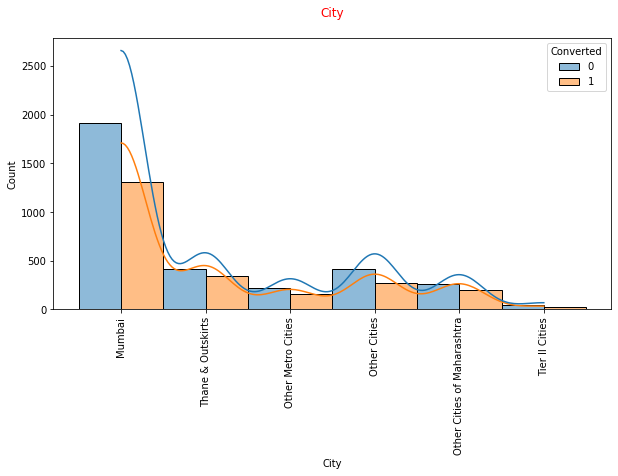

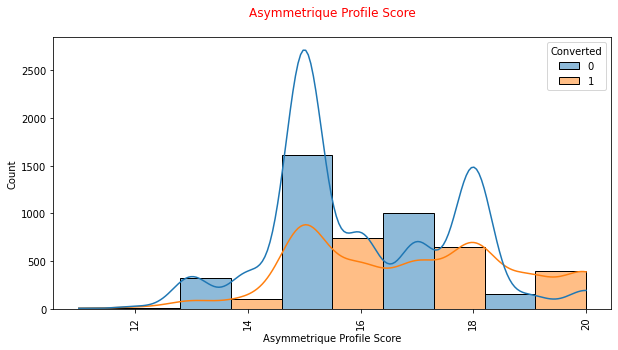

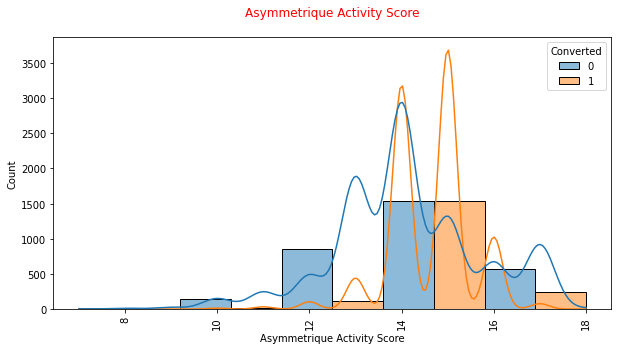

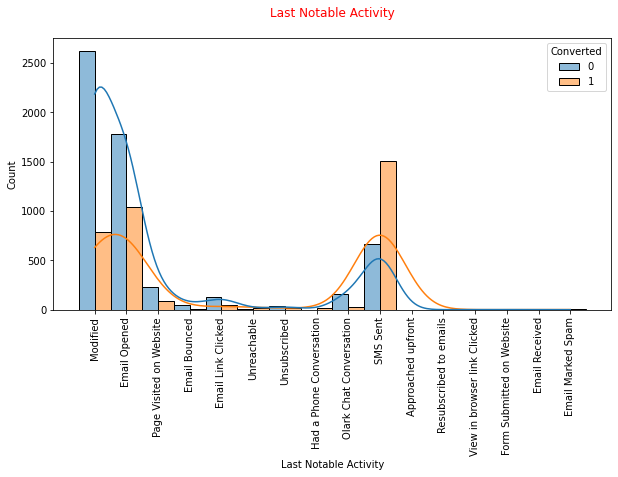

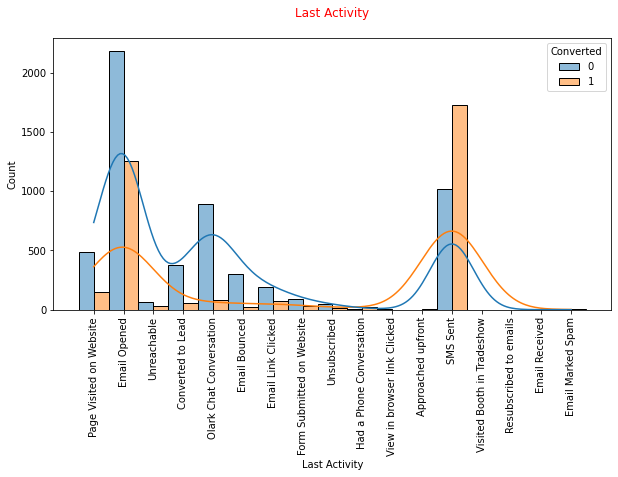

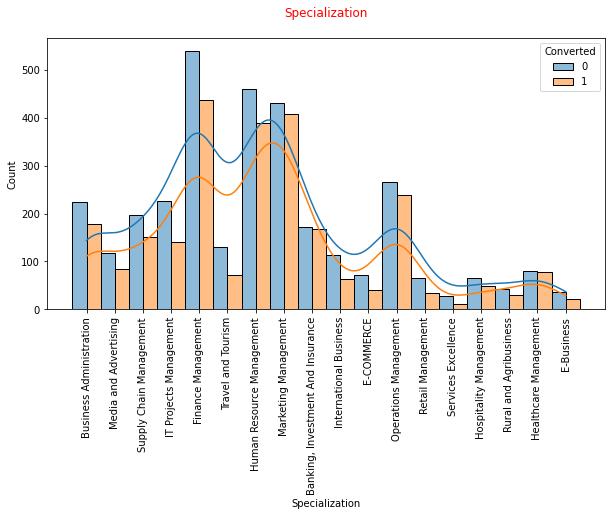

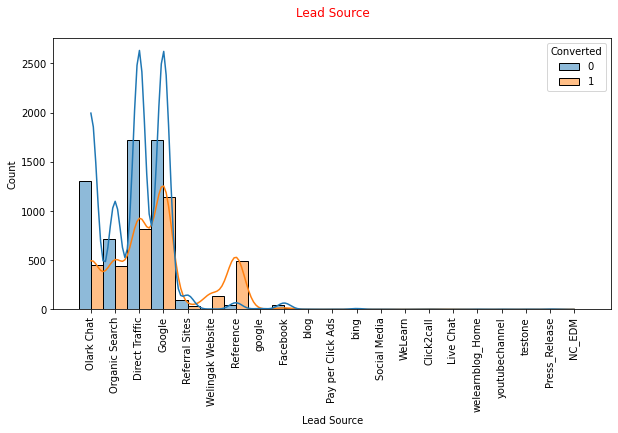

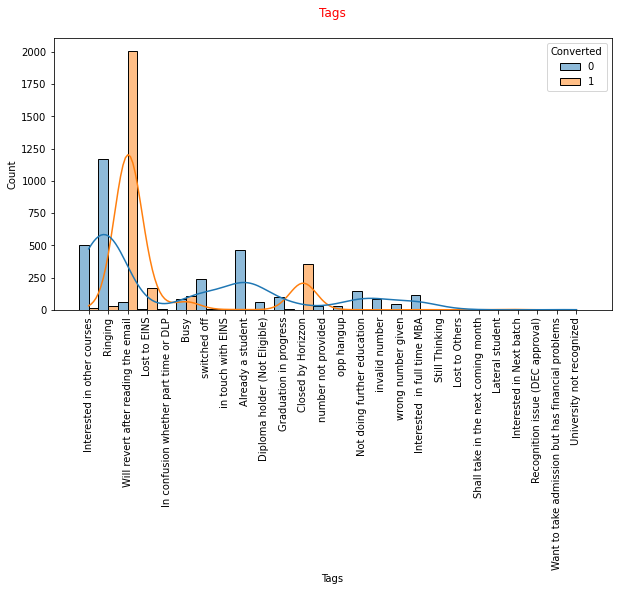

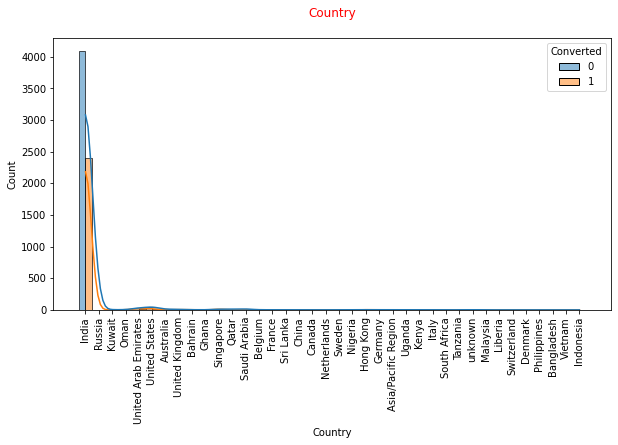

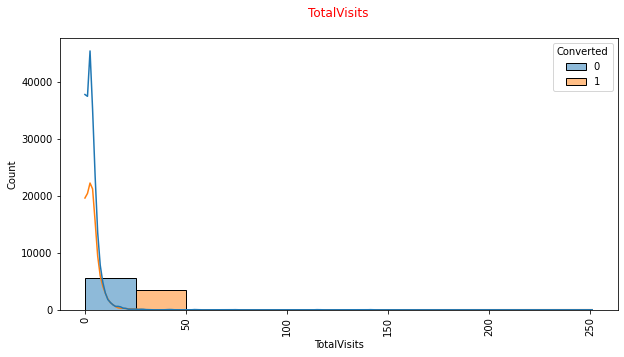

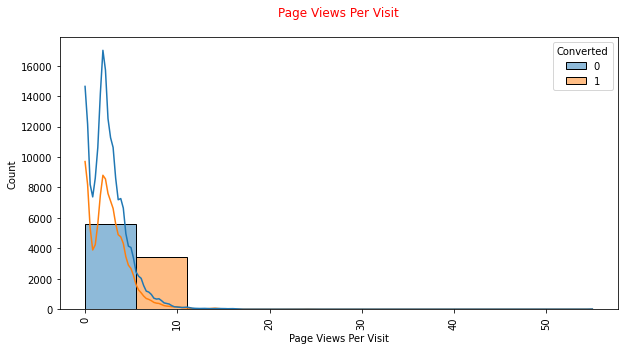

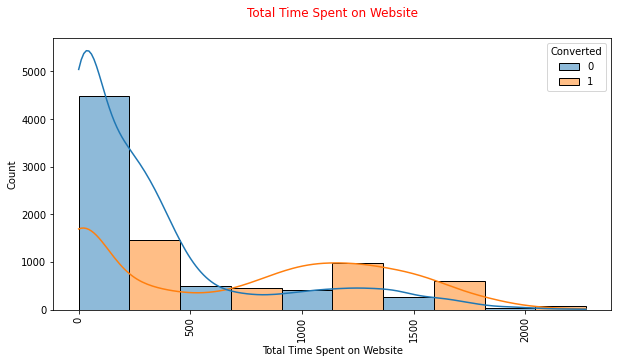

In [15]:
for col in df.columns:
    if col != 'Converted':
        plt.figure(figsize=[10,5])
        sns.histplot(data=df, x=col,multiple="dodge",hue='Converted',kde=True,bins=5)
        plt.title(f"{col}\n",color='red')
        plt.xticks(rotation=90)
        plt.show()
        print()

Majority of the customers has not seen the add at X education forum , Newspaper Article , Not searched , Not seen digital advertisement,Through Recommendation, or Newspaper

Customers who wants updates via call,Email are more likely to be a lead 

leaders show following behavior :
- They do not want a free  copy of mastering the interview 
- Medium asymmetrique activity index
- high asymmetrique profile index 
- They want better career prospectus 
- They might have lead quality and Landing page submission 
- They are unemployed and from Mumbai and thane and belong to India 
- They heard from online search and students from same school 
- have asymmetrique profile score ranging from 15 -18,Asymmetrique activity score ranging from 14 - 16
- they recently did the modification , opened their email and sent the SMS  and probably did the same as a last activity 
- majority of them  are specialized in projects management ,finance management ,human resource management ,marketing management.
- they comes from sectors like banking , investment and insurance and operation management 
- majority lead sources from Google ,direct traffic and organic search 
- they do revert after reading the email that shows their interest  
- they visit the website at least 50 times they visit the page at-least 10 times and spend at least 500 s on the website

In [16]:
#This are the columns that have missing values 
(df.isna().mean().sort_values(ascending=False)>0).sum()

14

to deal with the missing values we are going to replace the datatypes which are object with the mode and the datatypes which are int or float with its mean,median and mode

the below functions checks that after replacing the value with the respective method how much it affects the data based on its mean median and mode

after that it selects the best method so that the deflection must be very low or negligible

in the end it provide the absolute difference between the orignal data and the data after replacing the value

this function boosts up the analysis procedure

In [17]:
#dealing with nan
def nan_checking(col_name):
   
    if col_name.dtype=='object':
        
        col_name.fillna(col_name.mode()[0],inplace=True)
        print('missing values filled with mode')
        return(f"because for {col_name.name} mode is the best method to fill but there is no abs difference as the dtype is object\n")

    else:
        addition_org=[col_name.mean(),col_name.median(),col_name.mode()[0]]
       
        org_sum = sum(addition_org)
       
        addition_mean=[col_name.fillna(col_name.mean()).mean(),col_name.fillna(col_name.mean()).median(),col_name.fillna(col_name.mean()).mode()[0]]

        mean_sum = sum(addition_mean)

        addition_median=[col_name.fillna(col_name.median()).mean(),col_name.fillna(col_name.median()).median(),col_name.fillna(col_name.median()).mode()[0]]

        median_sum = sum(addition_median)
  
        addition_mode=[col_name.fillna(col_name.mode()[0]).mean(),col_name.fillna(col_name.mode()[0]).median(),col_name.fillna(col_name.mode()[0]).mode()[0]]

        mode_sum = sum(addition_mode)

        dic={"mean"  : abs(org_sum-mean_sum),
            "median" : abs(org_sum-median_sum),
            "mode"  : abs(org_sum-mode_sum)}
       
        if min(dic,key=dic.get) == 'mean':
            col_name.fillna(col_name.mean(),inplace=True)
            print('missing values filled with mean')
        elif min(dic,key=dic.get) == 'median':
            col_name.fillna(col_name.median(),inplace=True)
            print('missing values filled with median')
        else :
            col_name.fillna(col_name.mode()[0],inplace=True)
            print('missing values filled with mode')
     
        return(f"because for {col_name.name} {min(dic,key=dic.get)} is the best value to fill and the absolute difference is {dic[min(dic,key=dic.get)]}\n")


In [18]:
list_of_null_columns=[]

for k,v in (df.isna().mean().sort_values(ascending=False)>0)[:(df.isna().mean().sort_values(ascending=False)>0).sum()].items():
    list_of_null_columns.append(k)

for x in list_of_null_columns:
    print(f"{nan_checking(df[x])}")

missing values filled with median
because for Asymmetrique Profile Score median is the best value to fill and the absolute difference is 0.8425633705203666

missing values filled with mode
because for Asymmetrique Activity Index mode is the best method to fill but there is no abs difference as the dtype is object

missing values filled with mode
because for Asymmetrique Profile Index mode is the best method to fill but there is no abs difference as the dtype is object

missing values filled with median
because for Asymmetrique Activity Score median is the best value to fill and the absolute difference is 0.13980227259797573

missing values filled with mode
because for City mode is the best method to fill but there is no abs difference as the dtype is object

missing values filled with mode
because for Specialization mode is the best method to fill but there is no abs difference as the dtype is object

missing values filled with mode
because for Tags mode is the best method to fill but 

In [19]:
(df.isna().mean().sort_values(ascending=False)>0).sum()

0

In [20]:
df.head()

X Education Forums Newspaper Article Search Digital Advertisement  \
0                 No                No     No                    No   
1                 No                No     No                    No   
2                 No                No     No                    No   
3                 No                No     No                    No   
4                 No                No     No                    No   

  Through Recommendations Newspaper  Converted Do Not Call Do Not Email  \
0                      No        No          0          No           No   
1                      No        No          0          No           No   
2                      No        No          1          No           No   
3                      No        No          0          No           No   
4                      No        No          1          No           No   

  A free copy of Mastering The Interview Asymmetrique Activity Index  \
0                                     No                   02.Medium   
1                                     No                   02.Medium   
2                                    Yes                   02.Medium   
3                                     No                   02.Medium   
4                                     No                   02.Medium   

  Asymmetrique Profile Index What matters most to you in choosing a course  \
0                  02.Medium                       Better Career Prospects   
1                  02.Medium                       Better Career Prospects   
2                    01.High                       Better Career Prospects   
3                    01.High                       Better Career Prospects   
4                    01.High                       Better Career Prospects   

               Lead Origin What is your current occupation    City  \
0                      API                      Unemployed  Mumbai   
1                      API                      Unemployed  Mumbai   
2  Landing Page Submission                         Student  Mumbai   
3  Landing Page Submission                      Unemployed  Mumbai   
4  Landing Page Submission                      Unemployed  Mumbai   

   Asymmetrique Profile Score  Asymmetrique Activity Score  \
0                        15.0                         15.0   
1                        15.0                         15.0   
2                        20.0                         14.0   
3                        17.0                         13.0   
4                        18.0                         15.0   

  Last Notable Activity            Last Activity           Specialization  \
0              Modified  Page Visited on Website       Finance Management   
1          Email Opened             Email Opened       Finance Management   
2          Email Opened             Email Opened  Business Administration   
3              Modified              Unreachable    Media and Advertising   
4              Modified        Converted to Lead       Finance Management   

      Lead Source                                 Tags Country  TotalVisits  \
0      Olark Chat          Interested in other courses   India          0.0   
1  Organic Search                              Ringing   India          5.0   
2  Direct Traffic  Will revert after reading the email   India          2.0   
3  Direct Traffic                              Ringing   India          1.0   
4          Google  Will revert after reading the email   India          2.0   

   Page Views Per Visit  Total Time Spent on Website  
0                   0.0                            0  
1                   2.5                          674  
2                   2.0                         1532  
3                   1.0                          305  
4                   1.0                         1428

In [21]:
df["Converted"].value_counts()

0    5679
1    3561
Name: Converted, dtype: int64

In [22]:
#here we can see that the classes are not balenced so we need to balance them

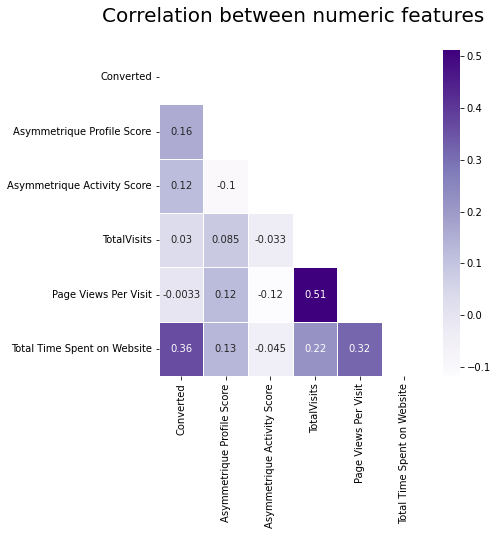

In [23]:
plt.figure(figsize=[6,6])
matrix = np.triu(df.corr())
sns.heatmap(df.corr(),linewidths=.5,cmap="Purples",annot=True,mask=matrix)
plt.title("Correlation between numeric features\n",size=20)
plt.show()

the above Heatmap provides us the inter relation between the variables 

### Creating dummies

In [24]:
#dummies helps us to undestand the data in a better way and do feeature selection 
data_dummies= pd.get_dummies(df,drop_first=True)
data_dummies

Converted  Asymmetrique Profile Score  Asymmetrique Activity Score  \
0             0                        15.0                         15.0   
1             0                        15.0                         15.0   
2             1                        20.0                         14.0   
3             0                        17.0                         13.0   
4             1                        18.0                         15.0   
...         ...                         ...                          ...   
9235          1                        17.0                         15.0   
9236          0                        19.0                         14.0   
9237          0                        20.0                         13.0   
9238          1                        16.0                         15.0   
9239          1                        18.0                         15.0   

      TotalVisits  Page Views Per Visit  Total Time Spent on Website  \
0             0.0                  0.00                            0   
1             5.0                  2.50                          674   
2             2.0                  2.00                         1532   
3             1.0                  1.00                          305   
4             2.0                  1.00                         1428   
...           ...                   ...                          ...   
9235          8.0                  2.67                         1845   
9236          2.0                  2.00                          238   
9237          2.0                  2.00                          199   
9238          3.0                  3.00                          499   
9239          6.0                  3.00                         1279   

      X Education Forums_Yes  Newspaper Article_Yes  Search_Yes  \
0                          0                      0           0   
1                          0                      0           0   
2                          0                      0           0   
3                          0                      0           0   
4                          0                      0           0   
...                      ...                    ...         ...   
9235                       0                      0           0   
9236                       0                      0           0   
9237                       0                      0           0   
9238                       0                      0           0   
9239                       0                      0           0   

      Digital Advertisement_Yes  Through Recommendations_Yes  Newspaper_Yes  \
0                             0                            0              0   
1                             0                            0              0   
2                             0                            0              0   
3                             0                            0              0   
4                             0                            0              0   
...                         ...                          ...            ...   
9235                          0                            0              0   
9236                          0                            0              0   
9237                          0                            0              0   
9238                          0                            0              0   
9239                          0                            0              0   

      Do Not Call_Yes  Do Not Email_Yes  \
0                   0                 0   
1                   0                 0   
2                   0                 0   
3                   0                 0   
4                   0                 0   
...               ...               ...   
9235                0                 1   
9236                0                 0   
9237                0                 1   
9238                0                 0   
9

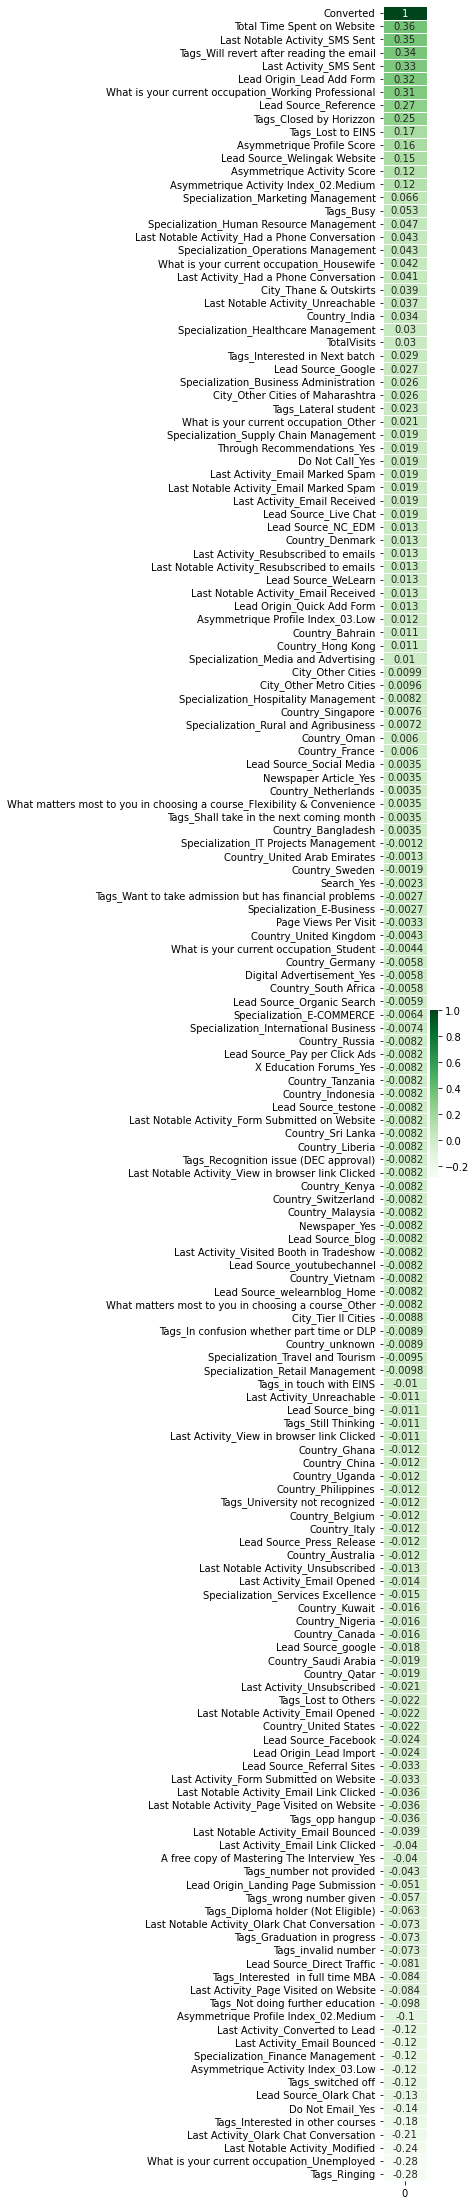

In [25]:
#finding the correlation with respect to the target variable 
plt.figure(figsize=[1,40])
sns.heatmap(pd.DataFrame(data_dummies.corrwith(data_dummies["Converted"]).sort_values(ascending=False)),
            linewidths=.5,cmap="Greens",annot=True)
plt.show()

In [26]:
y = data_dummies.pop('Converted')
X = data_dummies

### Dealing with class imbalance 

The **SMOTE** component in Azure Machine Learning designer to increase the number of underrepresented cases in a dataset that's used for machine learning. SMOTE is a better way of increasing the number of rare cases than simply duplicating existing cases.

**Synthetic Minority Oversampling Technique (SMOTE)** is a statistical technique for increasing the number of cases in your dataset in a balanced way. The component works by generating new instances from existing minority cases that you supply as input. This implementation of SMOTE does not change the number of majority cases.

The new instances are not just copies of existing minority cases. Instead, the algorithm takes samples of the feature space for each target class and its nearest neighbors. The algorithm then generates new examples that combine features of the target case with features of its neighbors. This approach increases the features available to each class and makes the samples more general.

SMOTE takes the entire dataset as an input, but it increases the percentage of only the minority cases. For example, suppose you have an imbalanced dataset where just 1 percent of the cases have the target value A (the minority class), and 99 percent of the cases have the value B. To increase the percentage of minority cases to twice the previous percentage, you would enter 200 for SMOTE percentage in the component's properties.

In [27]:
from imblearn.combine import SMOTETomek
smt = SMOTETomek(n_jobs=-1)
X_res, y_res = smt.fit_resample(X, y)

In [28]:
y_res.value_counts()

0    5470
1    5470
Name: Converted, dtype: int64

now dataset seems to be balanced 

In [29]:
X_res.head()

Asymmetrique Profile Score  Asymmetrique Activity Score  TotalVisits  \
0                        15.0                         15.0          0.0   
1                        15.0                         15.0          5.0   
2                        20.0                         14.0          2.0   
3                        17.0                         13.0          1.0   
4                        18.0                         15.0          2.0   

   Page Views Per Visit  Total Time Spent on Website  X Education Forums_Yes  \
0                   0.0                            0                       0   
1                   2.5                          674                       0   
2                   2.0                         1532                       0   
3                   1.0                          305                       0   
4                   1.0                         1428                       0   

   Newspaper Article_Yes  Search_Yes  Digital Advertisement_Yes  \
0                      0           0                          0   
1                      0           0                          0   
2                      0           0                          0   
3                      0           0                          0   
4                      0           0                          0   

   Through Recommendations_Yes  Newspaper_Yes  Do Not Call_Yes  \
0                            0              0                0   
1                            0              0                0   
2                            0              0                0   
3                            0              0                0   
4                            0              0                0   

   Do Not Email_Yes  A free copy of Mastering The Interview_Yes  \
0                 0                                           0   
1                 0                                           0   
2                 0                                           1   
3                 0                                           0   
4                 0                                           0   

   Asymmetrique Activity Index_02.Medium  Asymmetrique Activity Index_03.Low  \
0                                      1                                   0   
1                                      1                                   0   
2                                      1                                   0   
3                                      1                                   0   
4                                      1                                   0   

   Asymmetrique Profile Index_02.Medium  Asymmetrique Profile Index_03.Low  \
0                                     1                                  0   
1                                     1                                  0   
2                                     0                                  0   
3                                     0                                  0   
4                                     0                                  0   

   What matters most to you in choosing a course_Flexibility & Convenience  \
0                                                  0                         
1                                                  0                         
2                                                  0                         
3                                                  0                         
4                                                  0                         

   What matters most to you in choosing a course_Other  \
0                                                  0     
1                                                  0     
2                                                  0     
3                                                  0     
4                                                  0     

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                              

In [30]:
X_res["Converted"] = y_res

In [31]:
data_resampled = X_res 

In [32]:
data_resampled.shape
#since the data is now balanced so we have now more number of datapoints

(10940, 165)

### Train ,Test and Validation split

Splitting the dataset into train test and val parts with random state 49

In [33]:
from sklearn.model_selection import train_test_split
df_train_test, df_val = train_test_split(data_resampled,train_size = 0.8,test_size = 0.2, random_state = 49)

In [34]:
data_resampled.shape,df_train_test.shape, df_val.shape 

((10940, 165), (8752, 165), (2188, 165))

### Scaling 

Scaling the data from value 1 and 0 so that we get all of the data into the same range

**The transformation is given by:**

`X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))`

`X_scaled = X_std * (max - min) + min`

In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_train_test.head()

Asymmetrique Profile Score  Asymmetrique Activity Score  TotalVisits  \
8507                        17.0                         14.0          4.0   
6241                        16.0                         14.0          0.0   
4476                        16.0                         14.0          2.0   
3007                        16.0                         14.0          0.0   
40                          18.0                         13.0          7.0   

      Page Views Per Visit  Total Time Spent on Website  \
8507                   2.0                          653   
6241                   0.0                            0   
4476                   2.0                           82   
3007                   0.0                            0   
40                     7.0                           38   

      X Education Forums_Yes  Newspaper Article_Yes  Search_Yes  \
8507                       0                      0           0   
6241                       0                      0           0   
4476                       0                      0           0   
3007                       0                      0           0   
40                         0                      0           0   

      Digital Advertisement_Yes  Through Recommendations_Yes  Newspaper_Yes  \
8507                          0                            0              0   
6241                          0                            0              0   
4476                          0                            0              0   
3007                          0                            0              0   
40                            0                            0              0   

      Do Not Call_Yes  Do Not Email_Yes  \
8507                0                 0   
6241                0                 0   
4476                0                 0   
3007                0                 0   
40                  0                 1   

      A free copy of Mastering The Interview_Yes  \
8507                                           0   
6241                                           0   
4476                                           1   
3007                                           0   
40                                             1   

      Asymmetrique Activity Index_02.Medium  \
8507                                      1   
6241                                      1   
4476                                      1   
3007                                      1   
40                                        1   

      Asymmetrique Activity Index_03.Low  \
8507                                   0   
6241                                   0   
4476                                   0   
3007                                   0   
40                                     0   

      Asymmetrique Profile Index_02.Medium  Asymmetrique Profile Index_03.Low  \
8507                                     0                                  0   
6241                                     1                                  0   
4476                                     1                                  0   
3007                                     1                                  0   
40                                       0                                  0   

      What matters most to you in choosing a course_Flexibility & Convenience  \
8507                                                  0                         
6241                                                  0                         
4476                                                  0                         
3007                                                  0                         
40                                                    0                         

      What matters most to you in choosing a course_Other  \
8507                                                  0     
6241                                                  0     
4476                       

We are doing fit and transform both for the train column and only transform for the test column as fit method calculates the max and min values from the whole data and transform does the transformation

- doing fit_transform on val column can cause the data leakage so we are just performing transform on val df

In [36]:
df_train_test = pd.DataFrame(scaler.fit_transform(df_train_test), columns=df_train_test.columns)
df_val = pd.DataFrame(scaler.transform(df_val),columns=df_val.columns)

In [37]:
df_train_test.head()

Asymmetrique Profile Score  Asymmetrique Activity Score  TotalVisits  \
0                    0.666667                     0.636364     0.015936   
1                    0.555556                     0.636364     0.000000   
2                    0.555556                     0.636364     0.007968   
3                    0.555556                     0.636364     0.000000   
4                    0.777778                     0.545455     0.027888   

   Page Views Per Visit  Total Time Spent on Website  X Education Forums_Yes  \
0              0.036364                     0.300922                     0.0   
1              0.000000                     0.000000                     0.0   
2              0.036364                     0.037788                     0.0   
3              0.000000                     0.000000                     0.0   
4              0.127273                     0.017512                     0.0   

   Newspaper Article_Yes  Search_Yes  Digital Advertisement_Yes  \
0                    0.0         0.0                        0.0   
1                    0.0         0.0                        0.0   
2                    0.0         0.0                        0.0   
3                    0.0         0.0                        0.0   
4                    0.0         0.0                        0.0   

   Through Recommendations_Yes  Newspaper_Yes  Do Not Call_Yes  \
0                          0.0            0.0              0.0   
1                          0.0            0.0              0.0   
2                          0.0            0.0              0.0   
3                          0.0            0.0              0.0   
4                          0.0            0.0              0.0   

   Do Not Email_Yes  A free copy of Mastering The Interview_Yes  \
0               0.0                                         0.0   
1               0.0                                         0.0   
2               0.0                                         1.0   
3               0.0                                         0.0   
4               1.0                                         1.0   

   Asymmetrique Activity Index_02.Medium  Asymmetrique Activity Index_03.Low  \
0                                    1.0                                 0.0   
1                                    1.0                                 0.0   
2                                    1.0                                 0.0   
3                                    1.0                                 0.0   
4                                    1.0                                 0.0   

   Asymmetrique Profile Index_02.Medium  Asymmetrique Profile Index_03.Low  \
0                                   0.0                                0.0   
1                                   1.0                                0.0   
2                                   1.0                                0.0   
3                                   1.0                                0.0   
4                                   0.0                                0.0   

   What matters most to you in choosing a course_Flexibility & Convenience  \
0                                                0.0                         
1                                                0.0                         
2                                                0.0                         
3                                                0.0                         
4                                                0.0                         

   What matters most to you in choosing a course_Other  \
0                                                0.0     
1                                                0.0     
2                                                0.0     
3                                                0.0     
4                                                0.0     

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                              

In [38]:
df_val.head()

Asymmetrique Profile Score  Asymmetrique Activity Score  TotalVisits  \
0                    0.444444                     0.818182     0.007968   
1                    0.555556                     0.636364     0.000000   
2                    0.444444                     0.909091     0.000000   
3                    1.000000                     0.636364     0.007968   
4                    0.555556                     0.636364     0.011952   

   Page Views Per Visit  Total Time Spent on Website  X Education Forums_Yes  \
0              0.018182                     0.047465                     0.0   
1              0.000000                     0.000000                     0.0   
2              0.000000                     0.000000                     0.0   
3              0.036364                     0.800000                     0.0   
4              0.027273                     0.040553                     0.0   

   Newspaper Article_Yes  Search_Yes  Digital Advertisement_Yes  \
0                    0.0         0.0                        0.0   
1                    0.0         0.0                        0.0   
2                    0.0         0.0                        0.0   
3                    0.0         0.0                        0.0   
4                    0.0         0.0                        0.0   

   Through Recommendations_Yes  Newspaper_Yes  Do Not Call_Yes  \
0                          0.0            0.0              0.0   
1                          0.0            0.0              0.0   
2                          0.0            0.0              0.0   
3                          0.0            0.0              0.0   
4                          0.0            0.0              0.0   

   Do Not Email_Yes  A free copy of Mastering The Interview_Yes  \
0               0.0                                         0.0   
1               0.0                                         0.0   
2               0.0                                         0.0   
3               0.0                                         1.0   
4               0.0                                         0.0   

   Asymmetrique Activity Index_02.Medium  Asymmetrique Activity Index_03.Low  \
0                                    0.0                                 0.0   
1                                    1.0                                 0.0   
2                                    0.0                                 0.0   
3                                    1.0                                 0.0   
4                                    1.0                                 0.0   

   Asymmetrique Profile Index_02.Medium  Asymmetrique Profile Index_03.Low  \
0                                   1.0                                0.0   
1                                   1.0                                0.0   
2                                   1.0                                0.0   
3                                   0.0                                0.0   
4                                   1.0                                0.0   

   What matters most to you in choosing a course_Flexibility & Convenience  \
0                                                0.0                         
1                                                0.0                         
2                                                0.0                         
3                                                0.0                         
4                                                0.0                         

   What matters most to you in choosing a course_Other  \
0                                                0.0     
1                                                0.0     
2                                                0.0     
3                                                0.0     
4                                                0.0     

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                              

In [39]:
y_df_train_test = df_train_test.pop('Converted')
x_df_train_test = df_train_test

In [40]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Doing train_test_split 

In [41]:
x_train, x_test, y_train, y_test  = train_test_split(x_df_train_test,y_df_train_test,train_size = 0.8,test_size = 0.2, random_state = 13,stratify = y_df_train_test)

### RFE

**Feature ranking with recursive feature elimination.**

Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), the goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through any specific attribute or callable. Then, the least important features are pruned from current set of features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

In [42]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

rfe = RFE(lr)       
rfe = rfe.fit(x_train, y_train)

rfe_df = pd.DataFrame({'Feature': x_train.columns, 'Select Status': rfe.support_, 'Ranking': rfe.ranking_})
rfe_df.sort_values(by='Ranking')

Feature  Select Status  Ranking
0       Asymmetrique Profile Score           True        1
95    Lead Source_Welingak Website           True        1
92      Lead Source_Referral Sites           True        1
91           Lead Source_Reference           True        1
88      Lead Source_Organic Search           True        1
..                             ...            ...      ...
162                Country_Vietnam          False       79
100   Lead Source_welearnblog_Home          False       80
157               Country_Tanzania          False       81
89   Lead Source_Pay per Click Ads          False       82
90       Lead Source_Press_Release          False       83

[164 rows x 3 columns]

In [43]:
#rfe support is same as ranking 1
cols = x_train.columns[rfe.support_].to_list()
print(cols,end = "")

['Asymmetrique Profile Score', 'Asymmetrique Activity Score', 'TotalVisits', 'Total Time Spent on Website', 'Digital Advertisement_Yes', 'Do Not Email_Yes', 'Asymmetrique Activity Index_02.Medium', 'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form', 'What is your current occupation_Housewife', 'What is your current occupation_Student', 'What is your current occupation_Unemployed', 'What is your current occupation_Working Professional', 'City_Tier II Cities', 'Last Notable Activity_Email Link Clicked', 'Last Notable Activity_Email Opened', 'Last Notable Activity_Form Submitted on Website', 'Last Notable Activity_Modified', 'Last Notable Activity_Olark Chat Conversation', 'Last Notable Activity_Page Visited on Website', 'Last Notable Activity_Unreachable', 'Last Notable Activity_Unsubscribed', 'Last Activity_Converted to Lead', 'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked', 'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website', 'Last 

### Model Building 

### VIF

In general for finding the features which are significant we first drop the features having the highest p-value first and then we see weather after removing a feature with high p-value other features are significant or not (a feature is significant if the p-value of the feature is greater than the alpha [which is 0.05 for this problem]) if it is more than alpha then we drop that feature else we keep on repeating the process 2.So first we will drop the features with high p-value then we will drop the feature with high VIF(a feature has high VIF if it has the value more than 5 )and will keep on repeating the process till we get all the features balanced

     if the certain value has vif greater than 5 means :
             VIF = 1/(1-r2)
             5 = 1 / (1 -r2)
             5 - 5r2 = 1
             4 = 5r2
             r2 = 4/5 = 0.80

     so if the feature has more than 80 percent r2 with the target variable then we must drop that feature 

In [44]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from  sklearn.metrics import roc_auc_score
from sklearn import metrics

In [45]:
#this function returns the model summary,pvalues,pseudo_rsquared_score 
#for this i have used the statsmodel module 
def build_model(cols,x_df=x_train,y_df=y_train):
    x_df_sm = sm.add_constant(x_df[cols])
    lm = sm.GLM(y_df, x_df_sm, family = sm.families.Binomial()).fit()
    summary = lm.summary()
    pvalues = pd.DataFrame(lm.pvalues[1:],columns=['pvalue'])
    pseudo_rsquared_score = lm.pseudo_rsquared()
    return summary,pvalues,pseudo_rsquared_score

#this function returns the vif values of the features along with the correlation with the target variable 
#also it highlights the vif values which are greater than 5 
def get_vif_corr(cols,x_df=x_train,y_df=y_train):
    df1 = x_df[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],4)
    vif['corr'] =  round(x_df[cols].corrwith(y_df),4).values
    vif.set_index('Features',inplace=True)
    
    def color_red(value):
        color = 'red' if value > 5 else ''
        return 'color: %s'% color

    vif_corr = vif.sort_values(by='VIF',ascending=False).style.applymap(color_red)
    return vif_corr

# Defining the function to plot the ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.4f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None


#this function drops the features having the p-value greater than 0.05 which we have set as the leavel of significance 
# and in the end it returns the model summary and the vif_corr values 
#it also provides the features which are dropped 
def clean_p(iterations=len(cols),alpha=0.05,cols=cols):
    
    for x in range(iterations):
        summary, p,pseudo_rsquared_score = build_model(cols)
        if p. max()[0] > alpha:
            drop_fet = p[p==p. max()[0]].dropna().index[0]
            cols.remove(drop_fet)
            print(f"\n{drop_fet} having p = {p. max()[0]} removed which was greater than significance level {alpha}")
    print(f"\n{summary}\n")
    return get_vif_corr(cols)

In [46]:
get_vif_corr(cols)

In [47]:
clean_pp = clean_p()
clean_pp


Last Notable Activity_Form Submitted on Website having p = 0.9999007867380494 removed which was greater than significance level 0.05

Lead Source_blog having p = 0.9998957224145938 removed which was greater than significance level 0.05

Tags_Lateral student having p = 0.9998418701276193 removed which was greater than significance level 0.05

Lead Source_bing having p = 0.9998318860985153 removed which was greater than significance level 0.05

Lead Source_google having p = 0.9998222672862992 removed which was greater than significance level 0.05

Digital Advertisement_Yes having p = 0.999822212881148 removed which was greater than significance level 0.05

Tags_Interested in Next batch having p = 0.9998196045463764 removed which was greater than significance level 0.05

Country_Canada having p = 0.9997947597854197 removed which was greater than significance level 0.05

Country_France having p = 0.9997724738138609 removed which was greater than significance level 0.05

Country_Kuwait hav

clean p function will automatically remove the features having p value greater than 0.05 but manually we need to remove the features who have high VIF value 

so let's remove them one by one 

In [48]:
cols.remove("Asymmetrique Activity Score")
clean_pp =  clean_p()
clean_pp


Asymmetrique Activity Index_02.Medium having p = 0.6361725281764508 removed which was greater than significance level 0.05

Tags_in touch with EINS having p = 0.4697630662576474 removed which was greater than significance level 0.05

Last Notable Activity_Unreachable having p = 0.16359507407130602 removed which was greater than significance level 0.05

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 7001
Model:                            GLM   Df Residuals:                     6947
Model Family:                Binomial   Df Model:                           53
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1527.3
Date:                Sun, 10 Jul 2022   Deviance:                       3054.5
Time:                        11:45:48   Pearson chi2:                 1.10e+04
No. Iteratio

In [49]:
cols.remove("Asymmetrique Profile Score")
clean_pp = clean_p()
clean_pp


Specialization_Supply Chain Management having p = 0.07931309851861724 removed which was greater than significance level 0.05

Specialization_Media and Advertising having p = 0.11493836658145411 removed which was greater than significance level 0.05

Specialization_Operations Management having p = 0.12285848928669683 removed which was greater than significance level 0.05

Specialization_Marketing Management having p = 0.18953337246266955 removed which was greater than significance level 0.05

Specialization_Business Administration having p = 0.24140837772009638 removed which was greater than significance level 0.05

Specialization_E-Business having p = 0.05055789407263892 removed which was greater than significance level 0.05

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 7001
Model:                            GLM   Df Residuals:                     6954
Model Family:             

In [50]:
cols.remove("Last Activity_Email Opened")
clean_pp =  clean_p()
clean_pp


Last Activity_Email Link Clicked having p = 0.5823725377269086 removed which was greater than significance level 0.05

Last Activity_SMS Sent having p = 0.265141617720307 removed which was greater than significance level 0.05

Last Activity_Unreachable having p = 0.269224570431123 removed which was greater than significance level 0.05

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 7001
Model:                            GLM   Df Residuals:                     6958
Model Family:                Binomial   Df Model:                           42
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1623.2
Date:                Sun, 10 Jul 2022   Deviance:                       3246.4
Time:                        11:46:07   Pearson chi2:                 1.38e+04
No. Iterations:              

In [51]:
cols.remove("What is your current occupation_Unemployed")
clean_pp =  clean_p()
clean_pp


What is your current occupation_Student having p = 0.13326210567645905 removed which was greater than significance level 0.05

Specialization_Hospitality Management having p = 0.11488867965815125 removed which was greater than significance level 0.05

Last Activity_Form Submitted on Website having p = 0.0941948662926702 removed which was greater than significance level 0.05

Last Activity_Had a Phone Conversation having p = 0.06264144985282497 removed which was greater than significance level 0.05

Tags_Busy having p = 0.056941302149679324 removed which was greater than significance level 0.05

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 7001
Model:                            GLM   Df Residuals:                     6964
Model Family:                Binomial   Df Model:                           36
Link Function:                  Logit   Scale:                          1.0000
Me

In [52]:
#this are the features which are significant
cols

['TotalVisits',
 'Total Time Spent on Website',
 'Do Not Email_Yes',
 'Lead Origin_Landing Page Submission',
 'Lead Origin_Lead Add Form',
 'Last Notable Activity_Email Link Clicked',
 'Last Notable Activity_Email Opened',
 'Last Notable Activity_Modified',
 'Last Notable Activity_Olark Chat Conversation',
 'Last Notable Activity_Page Visited on Website',
 'Last Activity_Converted to Lead',
 'Last Activity_Email Bounced',
 'Last Activity_Olark Chat Conversation',
 'Last Activity_Page Visited on Website',
 'Last Activity_Unsubscribed',
 'Specialization_Finance Management',
 'Specialization_Human Resource Management',
 'Specialization_International Business',
 'Specialization_Retail Management',
 'Lead Source_Direct Traffic',
 'Lead Source_Google',
 'Lead Source_Olark Chat',
 'Lead Source_Organic Search',
 'Lead Source_Reference',
 'Lead Source_Referral Sites',
 'Tags_Closed by Horizzon',
 'Tags_Interested  in full time MBA',
 'Tags_Interested in other courses',
 'Tags_Lost to EINS',
 'T

In [53]:
#lets fit all those features into the Logistic regression model 
lr = LogisticRegression()
lr.fit(x_train[cols],y_train)

#doing the prediction on test data
y_pred = lr.predict(x_test[cols])

### Finding optimum threshold

In [54]:
threshs,accuracies,sensis,specis = [],[],[],[]
prediction_probability =  lr.predict_proba(x_test[cols])

for x in np.arange(0,1,0.1):
    predictions = []
    thresh = x
    for x in prediction_probability:
        if x[0] > thresh:
            predictions.append(0)
        else:
            predictions.append(1)
            
    # TP = confusion[1,1] # true positive 
    # TN = confusion[0,0] # true negatives
    # FP = confusion[0,1] # false positives
    # FN = confusion[1,0] # false negatives
            
    cm1 = metrics.confusion_matrix(y_test, predictions)
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    

    threshs.append(thresh)
    accuracies.append(accuracy)
    sensis.append(sensi)
    specis.append(speci)
    
scores_df = pd.DataFrame(list(zip(threshs,accuracies,sensis,specis)),columns=["thresh","accuracy","sensi","speci"])
scores_df.set_index("thresh",inplace=True)
scores_df.sort_values("accuracy",ascending=False)

accuracy     sensi     speci
thresh                              
0.5     0.925186  0.903226  0.946772
0.4     0.913764  0.870968  0.955832
0.6     0.908624  0.940092  0.877690
0.3     0.898344  0.826037  0.969422
0.7     0.884637  0.955069  0.815402
0.2     0.871502  0.759217  0.981880
0.8     0.847516  0.971198  0.725934
0.1     0.812107  0.625576  0.995470
0.9     0.800685  0.982719  0.621744
0.0     0.504283  0.000000  1.000000

if we have thresh 0.5 we will have better accuracy

In [55]:
import plotly.express as px
fig = px.line(scores_df, markers=True)
fig.update_layout(title_text='Optimum Threshold',title_x=0.5,uniformtext_minsize=8, uniformtext_mode='hide',
                  xaxis_title="Threshold", yaxis_title="Accuracy")
fig.update_layout({'plot_bgcolor': 'rgba(255,255,255,0)'})
fig.show()

In [56]:
prediction_probability =  lr.predict_proba(x_test[cols])

y_pred = []
thresh = .5
for x in prediction_probability:
    if x[0] > thresh:
        y_pred.append(0)
    else:
        y_pred.append(1)
        
from sklearn.metrics  import classification_report
print(classification_report(y_test, y_pred,digits=4))

              precision    recall  f1-score   support

         0.0     0.9087    0.9468    0.9273       883
         1.0     0.9434    0.9032    0.9229       868

    accuracy                         0.9252      1751
   macro avg     0.9261    0.9250    0.9251      1751
weighted avg     0.9259    0.9252    0.9251      1751



Confusion matrices represent counts from predicted and actual values. The output “TN” stands for True Negative which shows the number of negative examples classified accurately. Similarly, “TP” stands for True Positive which indicates the number of positive examples classified accurately. The term “FP” shows False Positive value, i.e., the number of actual negative examples classified as positive; and “FN” means a False Negative value which is the number of actual positive examples classified as negative. 

**ROC** curves are frequently used to show in a graphical way the connection/trade-off between clinical sensitivity and specificity for every possible cut-off for a test or a combination of tests

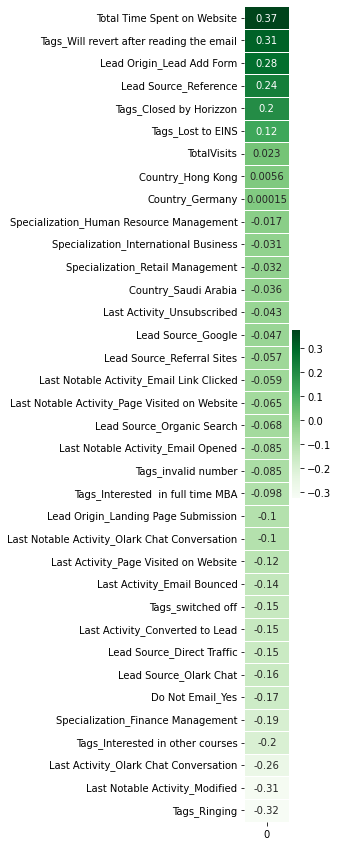

In [57]:
plt.figure(figsize=[1,15])
sns.heatmap(pd.DataFrame(x_train[cols].corrwith(y_train).sort_values(ascending=False)),
            linewidths=.5,cmap="Greens",annot=True)
plt.show()

In [58]:
#this are the top three positively correlated features   
pd.DataFrame(x_train[cols].corrwith(y_train).sort_values(ascending=False),columns=["Features"]).head(3)

Features
Total Time Spent on Website               0.373628
Tags_Will revert after reading the email  0.310597
Lead Origin_Lead Add Form                 0.280926

In [59]:
#this are the top three negatively correlated features   
pd.DataFrame(x_train[cols].corrwith(y_train).sort_values(ascending=False),columns=["Features"]).tail(3)

Features
Last Activity_Olark Chat Conversation -0.260607
Last Notable Activity_Modified        -0.310238
Tags_Ringing                          -0.322744

**What Is an Error Term?**

An error term is a residual variable produced by a statistical or mathematical model, which is created when the model does not fully represent the actual relationship between the independent variables and the dependent variables. As a result of this incomplete relationship, the error term is the amount at which the equation may differ during empirical analysis.

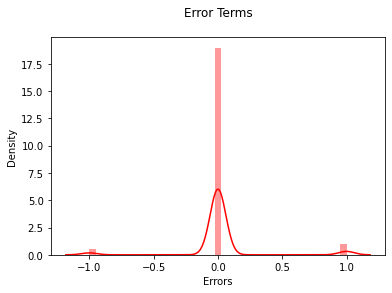

In [60]:
#Plot a histogram of the error terms
def plot_res_dist(act, pred):
    sns.distplot(act-pred,color='red')
    plt.title('Error Terms\n')
    plt.xlabel('Errors')
    
plot_res_dist(y_test,y_pred)

we can see that the mean lies at 0 so we have good model in hand

### PCA

Principal component analysis, or PCA, is a statistical procedure that allows you to summarize the information content in large data tables by means of a smaller set of “summary indices” that can be more easily visualized and analyzed. The underlying data can be measurements describing properties of production samples, chemical compounds or reactions, process time points of a continuous process, batches from a batch process, biological individuals or trials of a DOE-protocol,

In [61]:
from sklearn.decomposition import PCA

In [62]:
pca_calc = PCA()
df_train_pca = pca_calc.fit_transform(x_train[cols])

# Training the Regression Model
learner_pca = LogisticRegression()
model_pca_lr = learner_pca.fit(df_train_pca,y_train)

df_test_pca= pca_calc.transform(x_test[cols])

#Making prediction on the test data
pred_proba_test = model_pca_lr.predict_proba(df_test_pca)[:,1]

score = "{:2.4f}".format(roc_auc_score(y_test, pred_proba_test))

In [63]:
df_train_pca.shape,df_test_pca.shape,score

((7001, 36), (1751, 36), '0.9705')

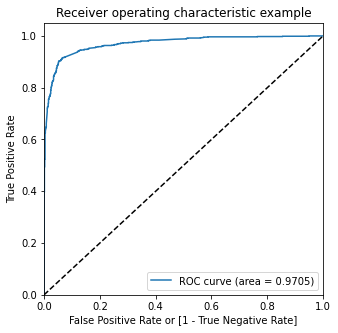

In [64]:
draw_roc(y_test, pred_proba_test)

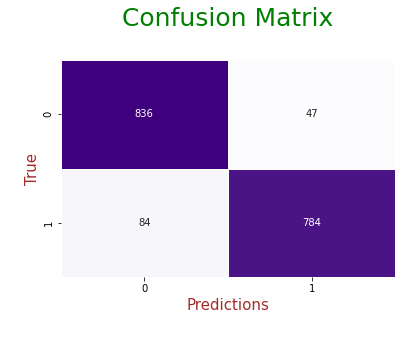

In [65]:
from sklearn.metrics import confusion_matrix
confusion_mtx = pd.DataFrame(confusion_matrix(y_test, np.where(pred_proba_test < 0.5, 0, 1)))
sns.heatmap(confusion_mtx,annot=True, fmt="d",linewidths=.5,cmap="Purples",cbar=False);
plt.ylabel("\nTrue",fontsize=15,color='brown')
plt.xlabel("Predictions\n",fontsize=15,color='brown')
plt.title("Confusion Matrix\n",fontsize=25,color='green')
plt.show()

### Testing the validation data 

In [66]:
df_val.head()

Asymmetrique Profile Score  Asymmetrique Activity Score  TotalVisits  \
0                    0.444444                     0.818182     0.007968   
1                    0.555556                     0.636364     0.000000   
2                    0.444444                     0.909091     0.000000   
3                    1.000000                     0.636364     0.007968   
4                    0.555556                     0.636364     0.011952   

   Page Views Per Visit  Total Time Spent on Website  X Education Forums_Yes  \
0              0.018182                     0.047465                     0.0   
1              0.000000                     0.000000                     0.0   
2              0.000000                     0.000000                     0.0   
3              0.036364                     0.800000                     0.0   
4              0.027273                     0.040553                     0.0   

   Newspaper Article_Yes  Search_Yes  Digital Advertisement_Yes  \
0                    0.0         0.0                        0.0   
1                    0.0         0.0                        0.0   
2                    0.0         0.0                        0.0   
3                    0.0         0.0                        0.0   
4                    0.0         0.0                        0.0   

   Through Recommendations_Yes  Newspaper_Yes  Do Not Call_Yes  \
0                          0.0            0.0              0.0   
1                          0.0            0.0              0.0   
2                          0.0            0.0              0.0   
3                          0.0            0.0              0.0   
4                          0.0            0.0              0.0   

   Do Not Email_Yes  A free copy of Mastering The Interview_Yes  \
0               0.0                                         0.0   
1               0.0                                         0.0   
2               0.0                                         0.0   
3               0.0                                         1.0   
4               0.0                                         0.0   

   Asymmetrique Activity Index_02.Medium  Asymmetrique Activity Index_03.Low  \
0                                    0.0                                 0.0   
1                                    1.0                                 0.0   
2                                    0.0                                 0.0   
3                                    1.0                                 0.0   
4                                    1.0                                 0.0   

   Asymmetrique Profile Index_02.Medium  Asymmetrique Profile Index_03.Low  \
0                                   1.0                                0.0   
1                                   1.0                                0.0   
2                                   1.0                                0.0   
3                                   0.0                                0.0   
4                                   1.0                                0.0   

   What matters most to you in choosing a course_Flexibility & Convenience  \
0                                                0.0                         
1                                                0.0                         
2                                                0.0                         
3                                                0.0                         
4                                                0.0                         

   What matters most to you in choosing a course_Other  \
0                                                0.0     
1                                                0.0     
2                                                0.0     
3                                                0.0     
4                                                0.0     

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                              

In [67]:
y_val = df_val.pop("Converted")
x_val = df_val

In [68]:
y_val_pred = lr.predict(x_val[cols])
print(classification_report(y_val, y_val_pred,digits=4))

              precision    recall  f1-score   support

         0.0     0.8798    0.9081    0.8938      1056
         1.0     0.9117    0.8843    0.8978      1132

    accuracy                         0.8958      2188
   macro avg     0.8957    0.8962    0.8958      2188
weighted avg     0.8963    0.8958    0.8958      2188



In [69]:
df_val_pca= pca_calc.transform(x_val[cols])

#Making prediction on the test data
pred_proba_val = model_pca_lr.predict_proba(df_val_pca)[:,1]
score_val = "{:2.4f}".format(roc_auc_score(y_val, pred_proba_val))
score_val

'0.9561'

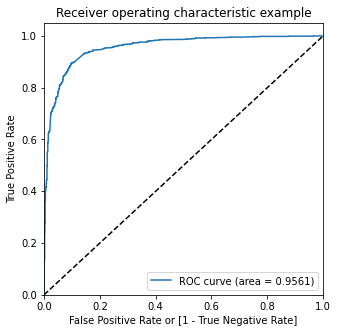

In [70]:
draw_roc(y_val, pred_proba_val)

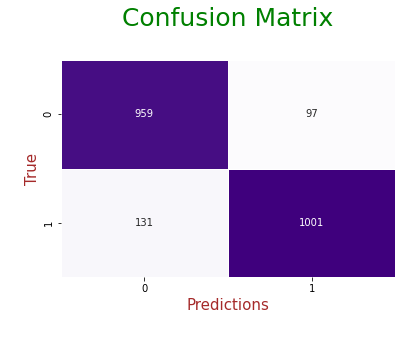

In [71]:
confusion_mtx = pd.DataFrame(confusion_matrix(y_val.astype("int64"), np.where(pred_proba_val < 0.5, 0, 1)))
sns.heatmap(confusion_mtx,annot=True, fmt="d",linewidths=.5,cmap="Purples",cbar=False);
plt.ylabel("\nTrue",fontsize=15,color='brown')
plt.xlabel("Predictions\n",fontsize=15,color='brown')
plt.title("Confusion Matrix\n",fontsize=25,color='green')
plt.show()

**Conclusion :**
    We have got a pretty much good model 
    also we have got the **accuracy of around 95.6 percent** on validation data set 
    
The important features are :

In [72]:
print(cols,end="")

['TotalVisits', 'Total Time Spent on Website', 'Do Not Email_Yes', 'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form', 'Last Notable Activity_Email Link Clicked', 'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified', 'Last Notable Activity_Olark Chat Conversation', 'Last Notable Activity_Page Visited on Website', 'Last Activity_Converted to Lead', 'Last Activity_Email Bounced', 'Last Activity_Olark Chat Conversation', 'Last Activity_Page Visited on Website', 'Last Activity_Unsubscribed', 'Specialization_Finance Management', 'Specialization_Human Resource Management', 'Specialization_International Business', 'Specialization_Retail Management', 'Lead Source_Direct Traffic', 'Lead Source_Google', 'Lead Source_Olark Chat', 'Lead Source_Organic Search', 'Lead Source_Reference', 'Lead Source_Referral Sites', 'Tags_Closed by Horizzon', 'Tags_Interested  in full time MBA', 'Tags_Interested in other courses', 'Tags_Lost to EINS', 'Tags_Ringing', 'Tags_Will reve